In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection
import matplotlib.pyplot as plt

## Name: Parthav Joshi
## Roll No: C045
### Aim: Implement Logistic Regression for classification in python to calculate class probability and evaluate the performance using confusion matrix

In [2]:
train = pd.read_csv('heart_fail_data.csv')
display(train.head(3))
print(train.shape)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


(306, 13)


In [3]:
X = train.iloc[:, :-1] # input feature
y = train.iloc[:,-1] # output features
display(X)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
301,65.0,0,94,1,50,1,188000.00,1.0,140,1,0,29
302,69.0,0,582,1,35,0,228000.00,3.5,134,1,0,30
303,90.0,1,60,1,50,0,226000.00,1.0,134,1,0,30
304,82.0,1,855,1,50,1,321000.00,1.0,145,0,0,30


In [4]:
display(y)

0      1
1      1
2      1
3      1
4      1
      ..
301    1
302    1
303    1
304    1
305    0
Name: DEATH_EVENT, Length: 306, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [6]:
from sklearn.preprocessing import StandardScaler
cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
scaler = StandardScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

## Kernel: RBF

In [7]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
preds = model.predict(X_test)
score=model.score(X_test, y_test)
print(score)

0.7903225806451613


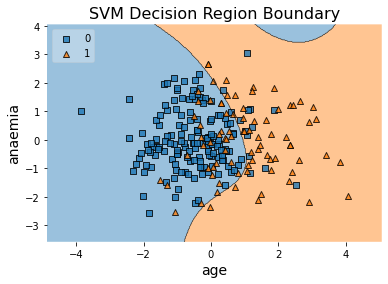

In [8]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
x_train2 = pca.fit_transform(X_train)
model.fit(x_train2, y_train)
plot_decision_regions(x_train2, y_train.values, clf=model, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()

## Kernel: Linear

In [9]:
model_lin = SVC(kernel = 'linear')
model_lin.fit(X_train, y_train)
preds = model_lin.predict(X_test)
score=model_lin.score(X_test, y_test)
print(score)

0.8225806451612904


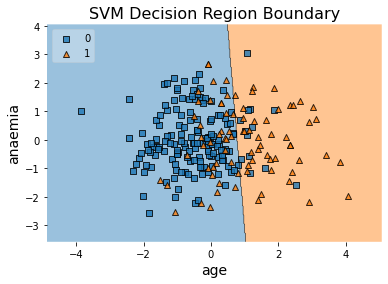

In [10]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
x_train2 = pca.fit_transform(X_train)
model_lin.fit(x_train2, y_train)
plot_decision_regions(x_train2, y_train.values, clf=model_lin, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()

## Kernel: Polynomial

In [11]:
model_poly = SVC(kernel = 'poly')
model_poly.fit(X_train, y_train)
preds = model_poly.predict(X_test)
score=model_poly.score(X_test, y_test)
print(score)

0.7580645161290323


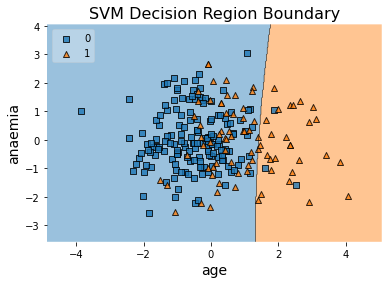

In [12]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
x_train2 = pca.fit_transform(X_train)
model_poly.fit(x_train2, y_train)
plot_decision_regions(x_train2, y_train.values, clf=model_poly, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()